In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

path = os.listdir('./archive/Training/')
classes = {'no_tumor':0,
          'pituitary_tumor':1}

In [25]:
import cv2 #imports the opencv library
X = [] #stores images after they are read/processed
Y = [] #stores the corresponding targets of the images

#iterates through each class: no_tumor and pituitary_tumor
for cls in classes:
    pth = './archive/Training/'+cls
    
    #iterates through each image in the particular class
    for j in os.listdir(pth):
        
        #reads an image file: 
            #1st argument is the path to the image, 
            #2nd argument (0) suggests that the image is read in grayscale
        img = cv2.imread(pth+'/'+j, 0)
        
        #resizes the image to 200x200 pixels
        img = cv2.resize(img, (200, 200))
        
        #appends the processed image to X[]
        X.append(img)
        
        #appends the target of the image
        Y.append(classes[cls])

In [4]:
#convert the arrays into numpy arrays
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

np.unique(Y)

array([0, 1])

In [5]:
pd.Series(Y).value_counts()
#The training data has 396 no_tumor patients and 827 with tumor

1    827
0    395
Name: count, dtype: int64

In [6]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

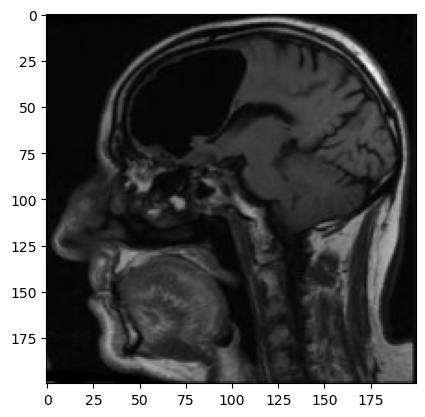

In [7]:
plt.imshow(X[0], cmap='gray')

In [31]:
#split the data into 2: training data and testing data
#20% will be testing and 80% will be training
x_train, x_test, y_train, y_test = train_test_split(X_updated, Y, shuffle=False, stratify=None, random_state = 10, test_size=0.20)
x_train.shape, x_test.shape

((977, 40000), (245, 40000))

In [32]:
print(x_train.max(), x_test.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test = x_test/255
print(x_train.max(), x_test.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [43]:
from sklearn.decomposition import PCA
pca = PCA(0.98)
pca_train=x_train
pca_test=x_test
# pca_train = pca.fit_transform(x_train)
# pca_test = pca.transform(x_test)

In [44]:
#Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [45]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, y_train)
sv = SVC()
sv.fit(pca_train, y_train)

/Users/arkdutt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [46]:
print(lg.score(pca_train, y_train))
print(lg.score(pca_test, y_test))

1.0
0.9918367346938776


In [47]:
print(sv.score(pca_train, y_train))
print(sv.score(pca_test, y_test))

0.9928352098259979
0.9877551020408163


In [48]:
#Prediction
pred = sv.predict(pca_test)
np.where(y_test!=pred)

(array([ 78, 112, 171]),)

In [49]:
#Predicting the indexed image
pred[36]

1

In [50]:
#The actual value of the indexed image
y_test[36]

1

In [51]:
dec = {0:'No Tumor', 1: 'Positive Tumor'}

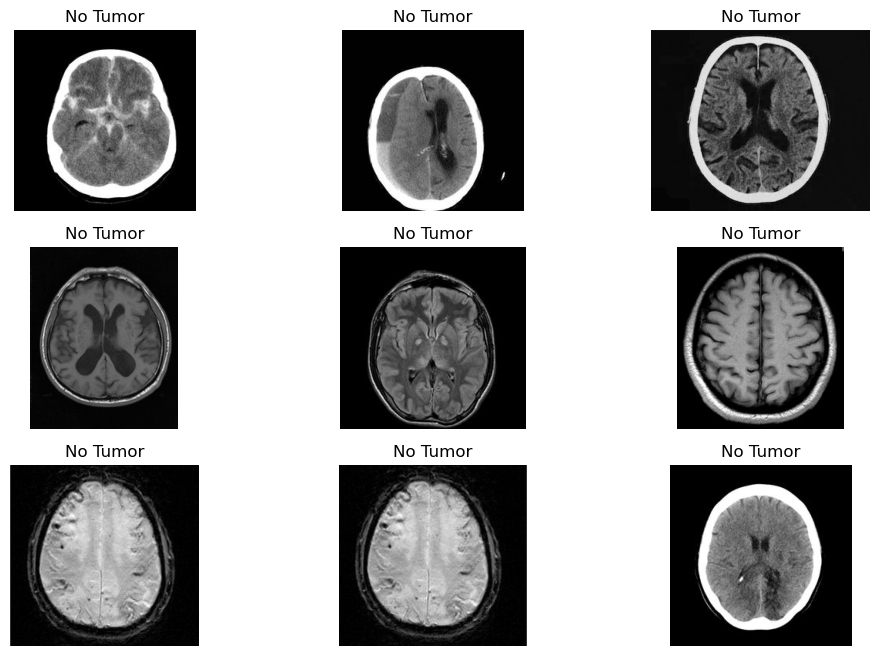

In [57]:
plt.figure(figsize=(12,8))
p = os.listdir('./archive/Testing/')
c=1
for i in os.listdir('./archive/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img = cv2.imread('./archive/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1